In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_path = "dataset/animals"

idg = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.2,

    # data augmentation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,

)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    save_to_dir="dataset/animals_augmentation",
    subset="training",
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(224, 224)
)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [3]:
model = models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation="relu", padding="same", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    layers.Dense(5, activation="softmax"),
])

d:\Program Files\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [19]:
# dataset_train = x_train & y_train
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=50)

# training and evaluating simultaneously:

Epoch 1/50


d:\Program Files\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2049 - loss: 1.6594 - val_accuracy: 0.2957 - val_loss: 1.5588
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3429 - loss: 1.5062 - val_accuracy: 0.4008 - val_loss: 1.3001
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.4300 - loss: 1.3163 - val_accuracy: 0.4981 - val_loss: 1.1455
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.4736 - loss: 1.2226 - val_accuracy: 0.5019 - val_loss: 1.1542
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5161 - loss: 1.1298 - val_accuracy: 0.5136 - val_loss: 1.1682
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5182 - loss: 1.1060 - val_accuracy: 0.4747 - val_loss: 1.1348
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5757 - loss: 1.0056 - val_accuracy: 0.5642 - val_loss: 1.0588
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5934 - loss: 0.9602 - val_accuracy: 0.5720 - val_loss: 1.0156
Epo

In [14]:
loss , accuracy = model.evaluate(dataset_validation)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 490ms/step - accuracy: 0.7397 - loss: 1.3165
validation loss: 1.2062755823135376
validation accuracy: 0.7548637986183167


In [22]:
model.save("weights/5_animals_weights.h5")

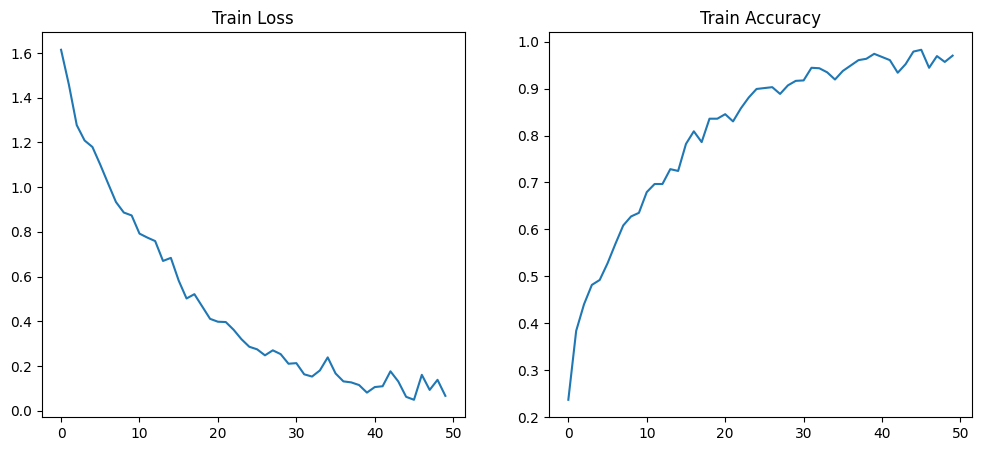

In [23]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history.history['loss'])
ax1.set_title("Train Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Train Accuracy")
plt.show()

In [7]:
model = tf.keras.models.load_model('weights/5_animals_weights.h5')

In [16]:
y_pred = model.predict(dataset_validation)
y_predict = np.argmax(y_pred , axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step


In [17]:
y_pred

array([[5.1785982e-11, 1.5777237e-06, 9.9978369e-01, 5.4344812e-10,
        2.1473519e-04],
       [1.7875046e-18, 6.3923135e-20, 2.5445412e-19, 7.1526606e-21,
        1.0000000e+00],
       [1.4822541e-02, 3.6864445e-04, 1.8740904e-05, 9.7092235e-01,
        1.3867715e-02],
       ...,
       [4.1608315e-02, 2.7896201e-03, 1.8637609e-05, 9.5547628e-01,
        1.0720948e-04],
       [2.8108348e-04, 9.5132178e-09, 2.2628116e-14, 9.9971884e-01,
        9.1325038e-13],
       [2.5726931e-05, 9.9997425e-01, 6.6457044e-09, 7.3457489e-09,
        4.0635094e-08]], dtype=float32)

In [18]:
y_predict

array([2, 4, 3, 3, 2, 3, 4, 1, 0, 3, 2, 2, 3, 3, 1, 4, 0, 1, 3, 4, 4, 1,
       0, 2, 2, 4, 1, 2, 4, 3, 0, 3, 3, 2, 4, 2, 0, 2, 2, 4, 1, 4, 0, 2,
       1, 0, 0, 2, 3, 3, 4, 3, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 1, 0, 2, 4,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 4, 1, 4, 3, 3, 4, 2, 1, 0, 2, 2, 2, 2,
       2, 0, 4, 4, 2, 1, 0, 2, 1, 4, 4, 2, 2, 2, 2, 2, 3, 1, 4, 4, 0, 2,
       1, 2, 0, 2, 1, 2, 1, 1, 4, 4, 3, 2, 3, 4, 4, 4, 3, 1, 1, 0, 4, 1,
       1, 0, 2, 0, 4, 0, 4, 1, 2, 4, 0, 4, 1, 1, 2, 1, 1, 2, 4, 0, 2, 1,
       0, 0, 4, 4, 0, 1, 4, 0, 2, 1, 4, 1, 2, 1, 1, 1, 1, 0, 0, 4, 0, 3,
       2, 2, 3, 1, 0, 3, 1, 0, 1, 2, 0, 4, 2, 3, 4, 4, 1, 3, 2, 1, 1, 1,
       0, 0, 0, 4, 1, 0, 0, 3, 0, 3, 3, 4, 1, 3, 1, 2, 1, 4, 1, 4, 1, 0,
       2, 2, 0, 1, 0, 4, 3, 2, 2, 3, 1, 4, 3, 0, 4, 0, 0, 4, 1, 3, 4, 0,
       0, 4, 1, 3, 1, 4, 3, 1, 0, 0, 0, 3, 3, 3, 1], dtype=int64)

In [19]:
dataset_validation.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

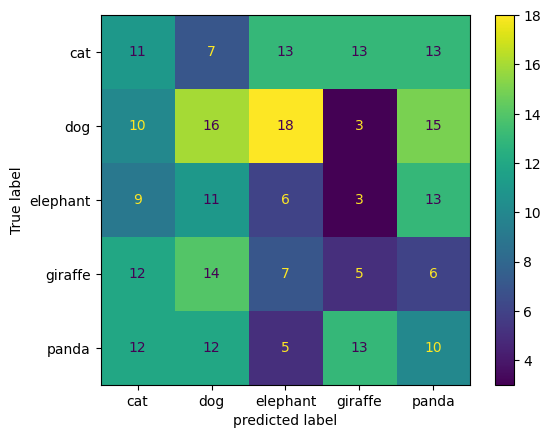

In [22]:
from sklearn import metrics
confusion_mat = metrics.confusion_matrix(dataset_validation.classes, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, 
                                            display_labels = ['cat', 'dog', 'elephant', 'giraffe', 'panda'])
cm_display.plot()
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

### inference code:

In [49]:
import cv2

image = cv2.imread("dog_image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224, 224))
image = image // 255.0
image = image.reshape(1, 224, 224, 3)

output = model.predict(image)
predicted_class = np.argmax(output)

if predicted_class == 0:
    print("🐱")
elif predicted_class == 1:
    print("🐶")
elif predicted_class == 2:
    print("🐘")  
elif predicted_class == 3:
    print("🦒")
elif predicted_class == 4:
    print("🐼")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
🐱
